## TESTING 2 __  PV 900 W + BATT 3 KW

##### RESTART KERNAL EVERY TIME  && RESET DATABASE

In [1]:
import pandas as pd
import MySQLdb
import numpy as np
import time
import datetime 
import random
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
z = 0
m1 = 0
m2 = 0
m3 = 0
m4 = 0
m5 = 0
m6 = 0
m7 = 0
m8 = 0
m9 = 0  

def end(j):
    check =1
    m1 = j+1
    m2 = j+1
    m3 = j+1
    m4 = j+1
    m5 = j+1
    m6 = j+1
    m7 = j+1
    m8 = j+1
    m9 = j+1
    while (check == 1):
        while df1.Computer[m1] > 0:
            m1 += 1
        while df1.TV[m2] > 0:
            m2 += 1
        while  df1.Fan[m3] > 0:
            m3 += 1
        while df1.kitchen_light[m4] > 0:
            m4 += 1
        while df1.bedroom_light[m5] > 0:
            m5 += 1
        while df1.hair_dryer[m6] > 0:
            m6 += 1
        while df1.elec_thermos[m7] > 0:
            m7 += 1
        while df1.water_heater[m8] > 0:
            m8 += 1
        while df1.air[m9] > 0:
            m9 += 1
        check = 0
        print "\ncheck_end position processing done!"
        print m1,m2,m3,m4,m5,m6,m7,m8,m9
        return (m1,m2,m3,m4,m5,m6,m7,m8,m9)
    
    
def state(j,m1,m2,m3,m4,m5,m6,m7,m8,m9):
    if j <= m1:
        ans1 = df1.Computer[j]
    else:
        ans1 = 0
    if j <= m2:
        ans2 = df1.TV[j]
    else:
        ans2 = 0
    if j <= m3:
        ans3 = df1.Fan[j]
    else:
        ans3 = 0
    if j <= m4:
        ans4 = df1.kitchen_light[j]
    else:
        ans4 = 0
    if j <= m5:
        ans5 = df1.bedroom_light[j]
    else:
        ans5 = 0
    if j <= m6:
        ans6 = df1.hair_dryer[j]
    else:
        ans6 = 0
    if j <= m7:
        ans7 = df1.elec_thermos[j]
    else:
        ans7 = 0
    if j <= m8:
        ans8 = df1.water_heater[j]
    else:
        ans8 = 0
    if j <= m9:
        ans9 = df1.air[j]
    else:
        ans9 = 0
    k = ans1+ans2+ans3+ans4+ans5+ans6+ans7+ans8+ans9
    print "substact k watt out from watt = ",k,"watt"
    return k 

def initial_trend(series, slen):
    sum = 0.0
    for i in range(slen):
        sum += float(series[i+slen] - series[i]) / slen
    return sum / slen

def triple_exponential_smoothing(series, slen, alpha, beta, gamma, n_preds):
    result = []
    seasonals = initial_seasonal_components(series, slen)
    for i in range(len(series)+n_preds):
        if i == 0: # initial values
            smooth = series[0]
            trend = initial_trend(series, slen)
            result.append(series[0])
            continue
        if i >= len(series): # we are forecasting
            m = i - len(series) + 1
            result.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = series[i]
            last_smooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-last_smooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            result.append(smooth+trend+seasonals[i%slen])
    return result


def initial_seasonal_components(series, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(series)/slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(series[slen*j:slen*j+slen])/float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += series[slen*j+i]-season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
    return seasonals
##-----------------------------------------------------------------------------------

from sklearn.metrics import mean_squared_error
def fittingparameter(data_y,j):
    count_alpha = 0
    count_beta = 0
    count_gamma = 0
    alpha = float(0)
    beta = float(0)
    gamma = float(0)
    index_alpha =[]
    index_beta =[]
    index_gamma = []
    act = j
    data = data_y
    pred_no = 1
    ramda = 0.1
    MSE_holtload = []    
#     query1 = "SELECT Timestamp,watt FROM PVBATT.P15min_prediction_data WHERE Timestamp >= '%s' AND TimeStamp <= '%s';"% (time_b[act+1],time_b[act+96])
    query_last = "SELECT Timestamp,watt FROM  PVBATT.test2_totalwatt WHERE Timestamp = '%s' ;"% (time_b_last[act+1])
    print query_last
    df1 = pd.read_sql(query_last, conn)
    while (alpha <= float(1)):
        count_alpha += 1
        beta = float(0)
        while (beta <=float(1)):
            count_beta += 1 
            gamma = float(0)
            while (gamma <= float(1)):
                count_gamma += 1
                pred_h = triple_exponential_smoothing(data, 96*7,alpha,beta ,gamma, pred_no)
                pred_data = pred_h[len(pred_h)-(pred_no):]                                               
                MSE = mean_squared_error (df1.watt, pred_data)   
#                 print MSE              
                MSE_holtload.append(MSE)
                index_alpha.append(alpha)
                index_beta.append(beta)
                index_gamma.append(gamma)     
#                 print index_alpha,index_beta,index_gamma
                gamma += ramda
            beta += ramda
        alpha += ramda  
#     print  count_gamma,count_beta,count_alpha    
    index_MSE = MSE_holtload.index(min(MSE_holtload))
#     print min(MSE_holtload)
#     print index_MSE
    MSE_min = MSE_holtload[index_MSE]
    alpha = index_alpha[index_MSE]
    beta = index_beta[index_MSE]
    gamma= index_gamma[index_MSE]
#     print count_alpha,count_beta,count_gamma
    print "the minimum MSE of prediction =",MSE_min,"by alpha =",alpha,"beta =",beta,"gamma =",gamma
    return (alpha,beta,gamma)

## __________________________________________________________________________________________________________
pred_no = 1 # power 1 Data/15min in 1Hr --> 60/15 = 4 and 1day = 4*24 = 96
j = 0
d = 30

time_a_last = pd.date_range('2016-09-03 00:00:00', periods=96*58, freq='15T')
time_b_last = pd.date_range('2016-09-30 23:44:59', periods=96*58, freq='15T')

time_a = pd.date_range('2016-10-01 00:00:00', periods=96*d, freq='15T')
time_b = pd.date_range('2016-10-01 00:14:59', periods=96*d, freq='15T')

conn = MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()

query_empty = """truncate table PVBATT.test2_PV900BATT3""" 
c.execute(query_empty)
print "PVBATT.test2_PV900BATT3 are Empty!!! \n"\


query1 = "SELECT *  FROM active.consum_load WHERE  Timestamp >= '%s'   AND Timestamp <= '%s'; " % (time_a[0],time_b[(96*d)-1])
df1 = pd.read_sql(query1, conn)

query = "SELECT Timestamp,watt,PV FROM PVBATT.concluded_p15min WHERE Timestamp>='%s'AND Timestamp<='%s'; "%('2016-10-01 00:00:00','2016-10-30 23:59:59')
df = pd.read_sql(query, conn)
df['PV'] = ((df.PV/10)*3)

A = float(20)
discount = (100-A)/100
batt = float(2.9*1000)
k = 0
minbatt = batt * 0.2
maxbatt = batt
levelbatt = []
levelbatt.append(float(batt))
pv_watt = []
batt_watt = []
grid_watt = []
effi = float(1)
overpv = float(0)
sum_overpv = float(0)
charging_watt = float(0)
count_active = 0

while ( j <= (96*d)-1 ):
    print "data at :" , j 
    print "______________________________________________________________________________________________\n",
    query_last = "\nSELECT Timestamp,watt FROM  PVBATT.test2_totalwatt WHERE Timestamp>='%s'AND Timestamp<='%s'; "%(time_a_last[0],time_b_last[j])
    print query_last
    df_last = pd.read_sql(query_last, conn)
    conn.commit()
    data_y = df_last['watt'].values.tolist()   
    ans_fiting = fittingparameter(data_y,j)
    
    query_last_new = "SELECT Timestamp,watt FROM  PVBATT.test2_totalwatt WHERE Timestamp>='%s'AND Timestamp<='%s';"%(time_a_last[0],time_b_last[j+1])
    query_last_new_1 = "SELECT Timestamp,watt FROM  PVBATT.test2_totalwatt WHERE Timestamp = '%s' ;"% (time_b_last[j+2])
    print "______________________________________________________________________________________________"
    print "\n",query_last_new  
    print query_last_new_1
    print "BY USE alpha =",ans_fiting[0],"beta =",ans_fiting[1],"gamma =",ans_fiting[2]
    df_last_new = pd.read_sql(query_last_new, conn)
    conn.commit()
    data_y = df_last_new['watt'].values.tolist()     
    pred_h = triple_exponential_smoothing(data_y, 96*7, ans_fiting[0], ans_fiting[1], ans_fiting[2],1)
    pred_data = pred_h[len(pred_h)-(pred_no):]
#     c.execute("INSERT INTO PVBATT.P15min_prediction (Timestamp, watt) VALUES ( %s, %s)",(time_b[j+1],abs(pred_data[0])))
#     conn.commit()
    pred_watt = abs(pred_data[0])
    target = pred_watt*discount
    print "predicted watt is ",pred_watt ," |||||   targeted watt at t is ",target
    print "______________________________________________________________________________________________\n"
    
    if (df.PV[j] != 0):
        if (levelbatt[j] == maxbatt):
            batt_t = levelbatt[j] - minbatt
            watt = df.watt[j] - k
            if (df.PV[j] > watt):
                pv_watt.append(float(watt))
                batt_watt.append(float(0))
                grid_watt.append(float(0))
                levelbatt.append(float(levelbatt[j]))
                sub = target - float(0)
                overpv = df.PV[j] - watt
                sum_overpv += overpv
            else:
                lefted_pv = watt-df.PV[j]
                pv_watt.append(float(df.PV[j]))
                if (batt_t > lefted_pv):
                    batt_watt.append(float(lefted_pv))
                    grid_watt.append(float(0))
                    levelbatt.append(float(levelbatt[j]-lefted_pv))
                    sub = target - float(0)
                else:
                    lefted_batt = lefted_pv - batt_t
                    batt_watt.append(float(batt_t))
                    grid_watt.append(float(lefted_batt))
                    levelbatt.append(float(levelbatt[j]-batt_t))
                    sub = target - lefted_batt               
        else:
            batt_t = levelbatt[j] - minbatt
            watt = df.watt[j] - k
            if (df.PV[j] > watt):
                pv_watt.append(float(watt))
                batt_watt.append(float(0))
                grid_watt.append(float(0))
                charging_watt = df.PV[j] - watt
                missing_watt = maxbatt - levelbatt[j]
                if (charging_watt > missing_watt):
                    charging_watt = missing_watt
                else:
                    charging_watt = charging_watt
                levelbatt.append(float(levelbatt[j]+(charging_watt*effi)))
                sub = target - float(0)
                overpv = df.PV[j] - watt - charging_watt
                sum_overpv += overpv   
            else:
                lefted_pv = watt-df.PV[j]
                pv_watt.append(float(df.PV[j]))
                if (batt_t > lefted_pv):
                    batt_watt.append(float(lefted_pv))
                    grid_watt.append(float(0))
                    levelbatt.append(float(levelbatt[j]-lefted_pv))
                    sub = target - float(0)
                else:
                    lefted_batt = lefted_pv - batt_t
                    batt_watt.append(float(batt_t))
                    grid_watt.append(float(lefted_batt))
                    levelbatt.append(float(levelbatt[j]-batt_t))
                    sub = target - lefted_batt              
            
    else :
        if (levelbatt[j] > minbatt):
            batt_t = levelbatt[j] - minbatt
            watt = df.watt[j] - k 
            if (batt_t > watt):
                pv_watt.append(float(0))
                batt_watt.append(float(watt))
                grid_watt.append(float(0))
                levelbatt.append(float(levelbatt[j]-watt))
                sub = target - float(0)
            else:
                lefted_batt = watt - batt_t
                pv_watt.append(float(0))
                batt_watt.append(float(batt_t))
                grid_watt.append(float(lefted_batt))
                levelbatt.append(float(levelbatt[j]-batt_t))
                sub = target - float(lefted_batt)                
        else:
            watt = df.watt[j] - k 
            pv_watt.append(float(0))
            batt_watt.append(float(0))
            grid_watt.append(float(watt))
            levelbatt.append(float(levelbatt[j]))
            sub = target -  watt
            
    print "Consuming watt =",watt       
    print "PV_CONSUMPTION =",pv_watt[j]
    print "BATT_CONSUMPTION =",batt_watt[j]
    print "GRID_CONSUMPTION =",grid_watt[j]
    print "PREVIOUS LEVELBATT =",levelbatt[j],"||| LEFTED LEVELBATT =",levelbatt[j+1]   
    print "PV GENERATION =",df.PV[j],"||| BATT_CHARGING =",charging_watt
    
    
    c.execute("INSERT INTO PVBATT.test2_totalwatt (Timestamp, watt) VALUES ( %s, %s)",(time_b[j],watt))               
    conn.commit()   
    c.execute("INSERT INTO PVBATT.test2_PV900BATT3 (Timestamp, load_watt,watt, predicted_watt, target,PV, charging_watt,levelbatt ,pv_watt , batt_watt,grid_watt,sum_load_watt) VALUES (%s,%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)",
              (time_b[j],df.watt[j],watt,pred_watt,target,df.PV[j],charging_watt,levelbatt[j],pv_watt[j],batt_watt[j],grid_watt[j],pv_watt[j]+batt_watt[j]+grid_watt[j]))
    conn.commit()   
    
    if j == 0:
        sum_sub = sub
       
    else :
        sum_sub = sum_sub + sub   
    
    if sum_sub < 0:
        print "\n______________________________ sum_substract is NEGATIVE_NOW________________________________ "
        count_active += 1
        m = end(j)
        m1 = m[0]
        m1 -= 1
        m2 = m[1]
        m2 -= 1
        m3 = m[2]
        m3 -= 1
        m4 = m[3]
        m4 -= 1
        m5 = m[4]
        m5 -= 1
        m6 = m[5]
        m6 -= 1
        m7 = m[6]
        m7 -= 1 
        m8 = m[7]
        m8 -= 1
        m9 = m[8]
        m9 -= 1
        j += 1
        k = state(j,m1,m2,m3,m4,m5,m6,m7,m8,m9)                      
    else: 
        print "\n______________________________ sum_substract is still POSITIVE_________________________________ "
        j += 1
        k = state(j,m1,m2,m3,m4,m5,m6,m7,m8,m9)  
    print "\n" 
    charging_watt = float(0)
    print "############################################END##################################################\n"
print "DONE!!"




PVBATT.test2_PV900BATT3 are Empty!!! 

data at : 0
______________________________________________________________________________________________

SELECT Timestamp,watt FROM  PVBATT.test2_totalwatt WHERE Timestamp>='2016-09-03 00:00:00'AND Timestamp<='2016-09-30 23:44:59'; 
SELECT Timestamp,watt FROM  PVBATT.test2_totalwatt WHERE Timestamp = '2016-09-30 23:59:59' ;
the minimum MSE of prediction = 0.0214982876656 by alpha = 0.7 beta = 0.4 gamma = 0.3
______________________________________________________________________________________________

SELECT Timestamp,watt FROM  PVBATT.test2_totalwatt WHERE Timestamp>='2016-09-03 00:00:00'AND Timestamp<='2016-09-30 23:59:59';
SELECT Timestamp,watt FROM  PVBATT.test2_totalwatt WHERE Timestamp = '2016-10-01 00:14:59' ;
BY USE alpha = 0.7 beta = 0.4 gamma = 0.3
predicted watt is  361.871487209  |||||   targeted watt at t is  289.497189767
______________________________________________________________________________________________

Consuming wat

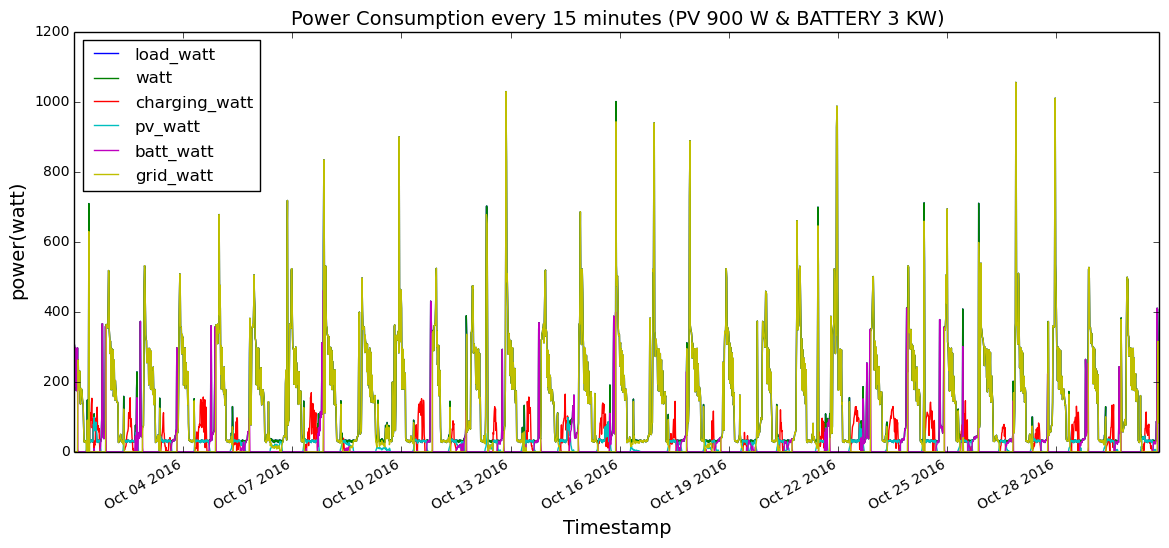

Total-Real power Consumption 367.2749973 KW
Total-Cut power Consumption 367.2749973 KW
GRID-Consumption = 300.987423329 KW
PV+BATT-Consumption = 66.287573971 KW
Over-PV power = 0.60656777 KW
Charging_watt = 34.74042007 KW
impact to user 0 time


In [4]:
import pandas as pd
import MySQLdb
import time
import sys
import numpy as np
import time
import datetime 
import random
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,mean_squared_error
import statistics 
%matplotlib inline 

conn = MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()

query1 = "SELECT Timestamp,load_watt,watt,charging_watt,pv_watt,batt_watt,grid_watt FROM  PVBATT.test2_PV900BATT3 WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; " % ('2016-10-01 00:00:00','2016-10-30 19:59:59')
df1 = pd.read_sql(query1, conn,index_col=['Timestamp'])
fig, ax = plt.subplots(figsize=(14, 6))
ax.set_title('Power Consumption every 15 minutes (PV 900 W & BATTERY 3 KW)', fontsize=14)
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('power(watt)', fontsize=14)
df1.plot(ax=ax)
plt.show()

print "Total-Real power Consumption", df1.load_watt.sum()/1000 ,"KW"
print "Total-Cut power Consumption", df1.watt.sum()/1000,"KW"
print "GRID-Consumption =", df1.grid_watt.sum()/1000,"KW"
print "PV+BATT-Consumption =", (df1.watt.sum()-df1.grid_watt.sum())/1000,"KW"
print "Over-PV power =", sum_overpv/1000,"KW"
print "Charging_watt =",  df1.charging_watt.sum()/1000,"KW"
print "impact to user", count_active, "time"